In [1]:
import numpy as np

location = 'p2_unsupervised/X.npy'
x_data = np.load(location)
x_data.shape

(2169, 45768)

In [2]:
def log_transform(data):
    arr_modificado = data.copy()
    arr_modificado = np.log2(arr_modificado + 1)
    return arr_modificado

x_data_transform = log_transform(x_data)
x_data_transform.shape
print(np.max(x_data_transform[:,0]))

5.972169178513185


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split # 👈 Importación clave
from sklearn.metrics import accuracy_score

# --- VARIABLES ASUMIDAS (De los pasos anteriores) ---
# x_data_transform: Data original log-transformada (alta dimensión).
# ASUMIMOS que x_data_transform está disponible y es una matriz de datos.
# --- DEBE SER REEMPLAZADA CON TUS DATOS REALES ---
# Ejemplo de datos ficticios si no tienes la variable real:
# n_samples, n_features = 1000, 500
# x_data_transform = np.random.rand(n_samples, n_features) 
# ----------------------------------------------------

# PASO 1: PCA para reducción de dimensionalidad (para K-Means)
pca50 = PCA(n_components=50)
X_pca50 = pca50.fit_transform(x_data_transform)
K_FINAL = 14 # Número de clusters óptimo.

# PASO 2: K-Means para generar etiquetas
kmeans = KMeans(n_clusters=K_FINAL, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca50) 
print(f"1. K-Means ejecutado con K={K_FINAL}. Etiquetas obtenidas.")

# PASO 3: Estandarización de la data original de alta dimensión
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_data_transform)
print("2. Data original estandarizada (X_scaled).")

# --------------------------------------------------------------------------
# 🔑 CAMBIO CLAVE: DIVISIÓN EN ENTRENAMIENTO Y PRUEBA
# Dividimos los datos escalados y las etiquetas de cluster. 
# Usaremos 80% para entrenar y 20% para la prueba.
# --------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, cluster_labels, test_size=0.2, random_state=42, stratify=cluster_labels
)
print("3. Data dividida en sets de entrenamiento (80%) y prueba (20%).")

# ------------------------------------------------------------
# PASO 4: REGRESIÓN LOGÍSTICA CON VALIDACIÓN CRUZADA
# (Ahora se entrena SOLO con el set de ENTRENAMIENTO)
# ------------------------------------------------------------
logreg_cv = LogisticRegressionCV(
  Cs=5,      # Prueba 5 valores de C
 penalty='l1',     # Regularización L1 (para selección de features)
 solver='liblinear',   
 multi_class='ovr',   
 cv=3,       # 3-fold Cross-Validation
 scoring='accuracy',   
 random_state=42,
 n_jobs=2 # Usar todos los cores para acelerar
)

# Entrenamos con los datos de entrenamiento
logreg_cv.fit(X_train, y_train)

# Extracción de resultados:
best_C = logreg_cv.C_[0] 
# --------------------------------------------------------------------------
# 🔑 CÁLCULO DE PRECISIÓN REAL: Usando el set de PRUEBA (X_test, y_test)
# --------------------------------------------------------------------------
final_accuracy = logreg_cv.score(X_test, y_test)

print(f"\n--- Resultados de Validación y Rendimiento (Métrica Real) ---")
print(f"4. Parámetro de Regularización (C) Óptimo: {best_C:.6f} (L1)")
print(f" Precisión en el set de **PRUEBA** (Métrica Real): {final_accuracy:.4f}")


# ------------------------------------------------------------
# PASO 5: SELECCIÓN DE LAS 100 MEJORES CARACTERÍSTICAS
# ------------------------------------------------------------

# Se usa el coeficiente ajustado con el C óptimo, el procedimiento es el mismo.
# NOTA: logreg_cv.coefs_paths_[0] almacena los coeficientes para el primer 
# fold de CV, lo cual es una simplificación común para la selección L1.
feature_importance = np.abs(logreg_cv.coef_).mean(axis=0) # Usar coef_ del modelo final

# 2. Encontrar los índices de las 100 características más importantes
top_100_indices = np.argsort(feature_importance)[::-1][:100] 

print(f"\n--- Selección de Features ---")
print(f"5. Se han seleccionado 100 índices de características más importantes.")
print(f" Los 5 índices más importantes (genes) son: {top_100_indices[:5]}")

1. K-Means ejecutado con K=14. Etiquetas obtenidas.
2. Data original estandarizada (X_scaled).
3. Data dividida en sets de entrenamiento (80%) y prueba (20%).


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



--- Resultados de Validación y Rendimiento (Métrica Real) ---
4. Parámetro de Regularización (C) Óptimo: 100.000000 (L1)
 Precisión en el set de **PRUEBA** (Métrica Real): 0.9032

--- Selección de Features ---
5. Se han seleccionado 100 índices de características más importantes.
 Los 5 índices más importantes (genes) son: [[   58    59    60 ... 15469 15525 27573]
 [    0     1     2 ...  5597 25861 45768]
 [    0     1     2 ...  5597 25861 45768]
 [    0     1     2 ...  5597 25861 45768]
 [45759 45758 45757 ... 45767 45768     0]]


In [5]:
feature_importance = np.abs(logreg_cv.coef_).mean(axis=0) # Usar coef_ del modelo final

# 2. Encontrar los índices de las 100 características más importantes
top_100_indices = np.argsort(feature_importance)[::-1][:100] 

In [6]:
import numpy as np

location = 'p2_evaluation/'

X_data_train =  np.load(location+'X_train.npy')
y_data_train =  np.load(location+'y_train.npy')

X_data_test = np.load(location+'X_test.npy')
y_data_test = np.load(location+'y_test.npy')

print(f'Shape of X_data_train: {X_data_train.shape}')
print(f'Shape of y_data_train: {y_data_train.shape}')

print(f'Shape of X_data_test: {X_data_test.shape}')
print(f'Shape of y_data_test: {y_data_test.shape}')

print('------------------------------')
def log_transform(data):
    arr_modificado = data.copy()
    arr_modificado = np.log2(arr_modificado + 1)
    return arr_modificado

X_train_transform = log_transform(X_data_train)
y_train_transform = log_transform(y_data_train)

X_test_transform = log_transform(X_data_test)
y_test_transform = log_transform(y_data_test)

print(f'Shape of X_train_transform: {X_train_transform.shape}')
print(f'Shape of y_train_transform: {y_train_transform.shape}')

print(f'Shape of X_test_transform: {X_test_transform.shape}')
print(f'Shape of y_test_transform: {y_test_transform.shape}')

Shape of X_data_train: (1077, 45768)
Shape of y_data_train: (1077,)
Shape of X_data_test: (1108, 45768)
Shape of y_data_test: (1108,)
------------------------------
Shape of X_train_transform: (1077, 45768)
Shape of y_train_transform: (1077,)
Shape of X_test_transform: (1108, 45768)
Shape of y_test_transform: (1108,)


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



--- 1. Resultado del Modelo con 100 Features Seleccionadas (LogReg) ---
Puntaje de Clasificación (Accuracy): 0.7617 <--- ESTE ES EL SCORE A REPORTAR


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


2. Puntaje de Clasificación (Random Baseline): 0.4016


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


3. Puntaje de Clasificación (High-Variance Baseline): 0.9269


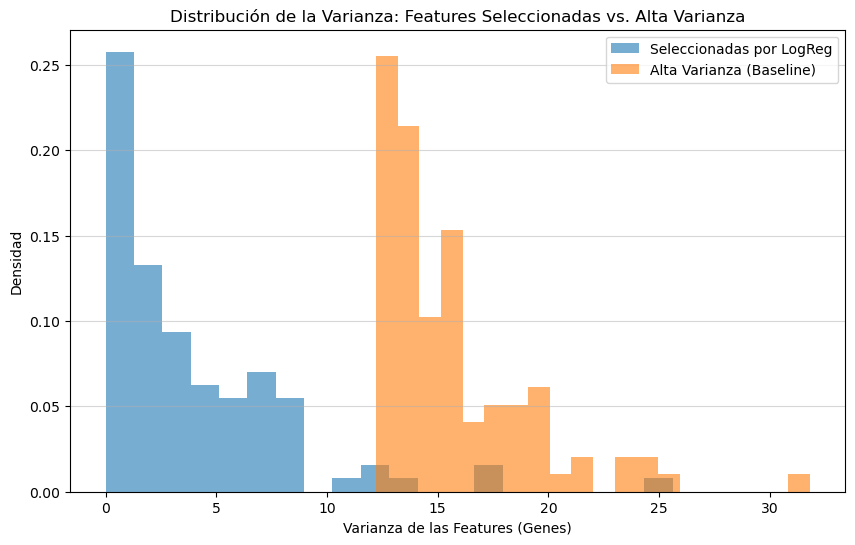

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# --- VARIABLES REQUERIDAS ---
# top_100_indices: Índices de los 100 genes seleccionados del paso anterior.
# X_train_transform: Data de entrenamiento log-transformada.
# y_data_train: Etiquetas de CLASE originales para el entrenamiento.
# X_test_transform: Data de prueba log-transformada.
# y_data_test: Etiquetas de CLASE originales para la prueba.
# -----------------------------

# ------------------------------------------------------------
# PASO 1: PREPARACIÓN DE LA DATA FILTRADA (FEATURES SELECCIONADAS)
# ------------------------------------------------------------

# Filtrar la data de entrenamiento y prueba a solo las 100 features seleccionadas
X_train_selected = X_train_transform[:, top_100_indices]
X_test_selected = X_test_transform[:, top_100_indices]

# Estandarizar la data FILTRADA
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


# ------------------------------------------------------------
# PASO 2: ENTRENAR Y EVALUAR EL MODELO CON LAS FEATURES SELECCIONADAS
# ------------------------------------------------------------

# Entrenar el clasificador de Regresión Logística
logreg_eval = LogisticRegression(
    penalty='l2',           # Se usa L2 para la evaluación final
    solver='liblinear',
    multi_class='ovr',
    random_state=42,
    C=100                   # Usamos C por defecto (o el óptimo encontrado previamente)
)

logreg_eval.fit(X_train_scaled, y_data_train)
y_pred_selected = logreg_eval.predict(X_test_scaled)
score_selected = accuracy_score(y_data_test, y_pred_selected)

print(f"\n--- 1. Resultado del Modelo con 100 Features Seleccionadas (LogReg) ---")
print(f"Puntaje de Clasificación (Accuracy): {score_selected:.4f} <--- ESTE ES EL SCORE A REPORTAR")


# ------------------------------------------------------------
# PASO 3: CÁLCULO DE BASELINES (Random y High-Variance)
# ------------------------------------------------------------

# A. BASELINE 1: 100 FEATURES AL AZAR (RANDOM)
num_features = X_train_transform.shape[1]
# Seleccionar 100 índices al azar
np.random.seed(42) # Usar semilla para reproducibilidad
random_indices = np.random.choice(num_features, 100, replace=False)

X_train_random = X_train_transform[:, random_indices]
X_test_random = X_test_transform[:, random_indices]

scaler_r = StandardScaler()
X_train_random = scaler_r.fit_transform(X_train_random)
X_test_random = scaler_r.transform(X_test_random)

logreg_random = LogisticRegression(penalty='l2', solver='liblinear', multi_class='ovr', random_state=42)
logreg_random.fit(X_train_random, y_data_train)
score_random = accuracy_score(y_data_test, logreg_random.predict(X_test_random))

print(f"2. Puntaje de Clasificación (Random Baseline): {score_random:.4f}")

# B. BASELINE 2: 100 FEATURES CON ALTA VARIANZA (HIGH-VARIANCE)
# Calcular la varianza sobre el set de entrenamiento transformado
variances = np.var(X_train_transform, axis=0)
# Obtener los índices de las 100 features de más alta varianza
high_variance_indices = np.argsort(variances)[::-1][:100]

X_train_hv = X_train_transform[:, high_variance_indices]
X_test_hv = X_test_transform[:, high_variance_indices]

scaler_hv = StandardScaler()
X_train_hv = scaler_hv.fit_transform(X_train_hv)
X_test_hv = scaler_hv.transform(X_test_hv)

logreg_hv = LogisticRegression(penalty='l2', solver='liblinear', multi_class='ovr', random_state=42)
logreg_hv.fit(X_train_hv, y_data_train)
score_hv = accuracy_score(y_data_test, logreg_hv.predict(X_test_hv))

print(f"3. Puntaje de Clasificación (High-Variance Baseline): {score_hv:.4f}")


# ------------------------------------------------------------
# PASO 4: VISUALIZACIÓN DE LA VARIANZA (HISTOGRAMA)
# ------------------------------------------------------------

# Varianzas de los 100 genes seleccionados
variances_selected = np.var(X_train_transform, axis=0)[top_100_indices]

# Varianzas de los 100 genes con alta varianza (los mismos 100 que usamos en el baseline)
variances_high_variance = np.var(X_train_transform, axis=0)[high_variance_indices]

plt.figure(figsize=(10, 6))
# Superponer ambos histogramas (usando density=True para comparar las distribuciones)
plt.hist(variances_selected, bins=20, alpha=0.6, label='Seleccionadas por LogReg', density=True)
plt.hist(variances_high_variance, bins=20, alpha=0.6, label='Alta Varianza (Baseline)', density=True)

plt.title('Distribución de la Varianza: Features Seleccionadas vs. Alta Varianza')
plt.xlabel('Varianza de las Features (Genes)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

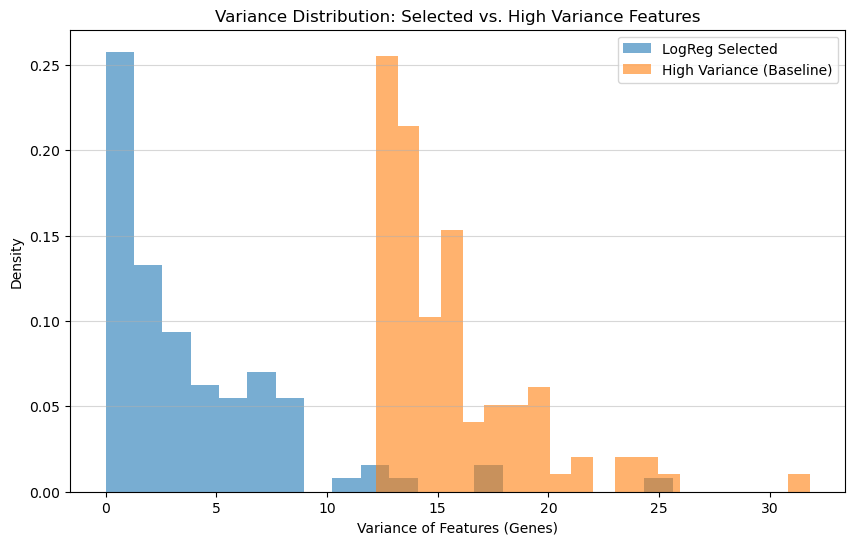

In [8]:
# Variances of the 100 selected genes
variances_selected = np.var(X_train_transform, axis=0)[top_100_indices]

# Variances of the 100 high-variance genes (the same 100 used for the baseline)
variances_high_variance = np.var(X_train_transform, axis=0)[high_variance_indices]

plt.figure(figsize=(10, 6))
# Overlay both histograms (using density=True to compare distributions)
plt.hist(variances_selected, bins=20, alpha=0.6, label='LogReg Selected', density=True)
plt.hist(variances_high_variance, bins=20, alpha=0.6, label='High Variance (Baseline)', density=True)

plt.title('Variance Distribution: Selected vs. High Variance Features')
plt.xlabel('Variance of Features (Genes)')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()